In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Functional API
In this module, we will explore Keras's another model building API called functional API.
Here is the documentation: https://keras.io/getting-started/functional-api-guide/

In `Sequential`, you build a model by adding a layer to the `model` object:

```
model = Sequential()
model.add(Conv2D(32, 3, input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(32, 3))
model.add(Activation('relu'))
```

However, in functional API, you define the inpute parameters and pass the input into the appropiate layer and the subsequent output is passed as input into the appropiate layer.  Lastly you define the inputs and outputs in a Model layer:   
```
inputs = Input(shape=(32,32,3))
conv1 = Conv2D(32,3, activation='relu')(inputs)
conv2 = Conv2D(32,3)(conv1)
conv2 = BatchNormalization()(conv2)
conv2 = Activation('relu')(conv2)
output = Dense(10, activation='softmax')(conv2)

model = Model(inputs=inputs, outputs=output)
```
As you can see from above, the functional API model needs a separate layer for input and output. Input() creates the the input tensor. Model() makes a model object from the output tensor. 

An advantage of functional API over Sequential is its flexibility. You can build a model architecture that has parallel paths or merging layers.

```
conv1 = Conv2D(32,3,activation='relu')(conv0)
conv2 = Conv2D(32,5,activation='relu')(conv0)
concat = Concatenate(axis=-1)([conv1, conv2])
conv3 = Conv2D(32,3,activation='relu')(concat)

```
The above example shows that the feature map from conv0 is split into two paths which are passed to conv1, and conv2 and then concatenated before passing to conv3:

```

         ____ conv1 (3x3)____
        /                    \   
conv0---                      (concatenate) -- conv3 (3x3)
        \____ conv2 (5x5)____/
        
```

# Below is an example of building a Functional API model using the CIFAR10 dataset

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model # This will print model architecture.
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation # We add the Concatentate function
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, SeparableConv2D, GlobalAveragePooling2D # We will use AveragePooling2D. Similar to MaxPooling but now we take the average value in the window.
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# set np and tf random seed for reproducibility
np.random.seed(42)

# load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Reshape xblock data and normalize

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= train_images.max()
test_images /= test_images.max()

classes = np.unique(train_labels)
nClasses = len(classes)
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# convert to labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#split into validation and train data
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)


#Here is an example on how to build a Functional API architecture

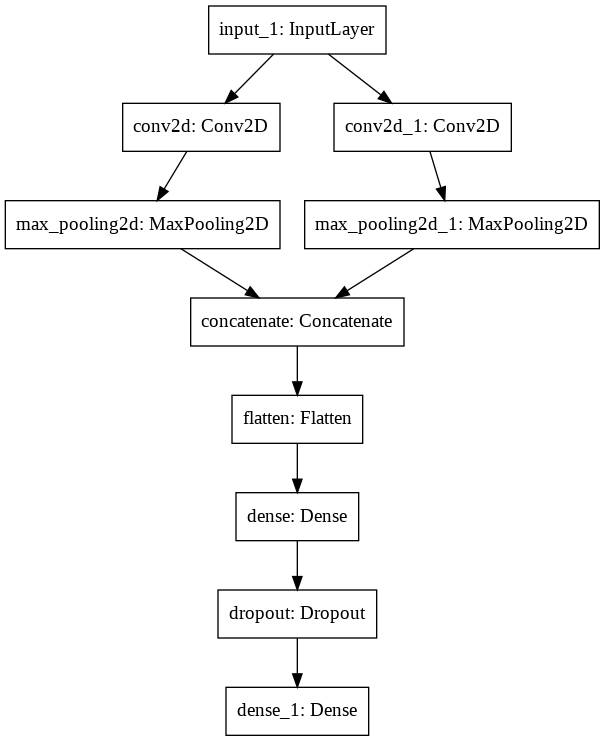

In [ ]:
backend.clear_session()

# Input model
visible = Input(shape=(32,32,3))

# Create Tower 1
conv11 = Conv2D(32, (3,3), padding = 'same', activation='relu')(visible)
pool11 = MaxPooling2D((2, 2), padding = 'same')(conv11)

# Create Tower 2
conv21 = Conv2D(32, (3,3), padding = 'same', activation='relu')(visible)
pool21 = MaxPooling2D((2,2), padding = 'same')(conv21)

# Concatentate
merge = Concatenate(axis=-1)([pool11, pool21])

# Flatten into fully connected layer
flat = Flatten()(merge)

# Hidden connected layer and output
hidden = Dense(32, activation='relu')(flat)
drop = Dropout(0.5)(hidden)
output = Dense(10, activation='softmax')(drop)

model_example = Model(inputs=visible, outputs=output)
# plot graph
plot_model(model_example)

# Your Turn.  Use the CIFAR10 dataset throughout the assignment

### Build the Inception model found in figure 7.8 in Deep Learning with Python (Chollet) 
### Print (plot) the model architecture

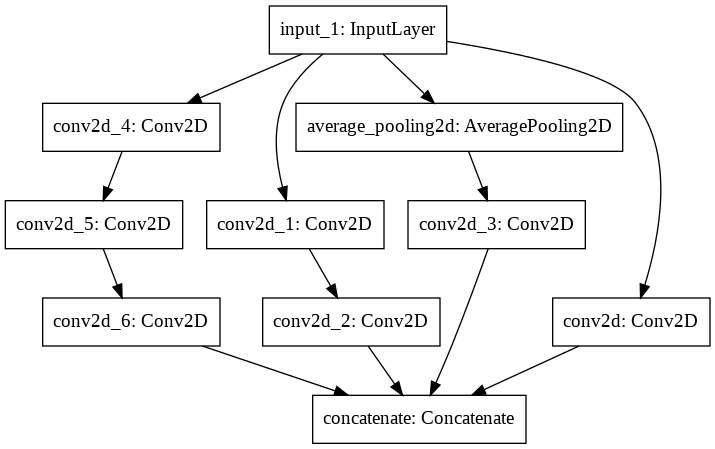

In [ ]:
# Build and print (plot) the model architecture found in figure 7.8 (Chollet)

backend.clear_session()

# Input model
visible = Input(shape=(32,32,3))

# Create Tower 1
conv11 = Conv2D(32, (1,1), activation='relu', strides=2, padding = 'same')(visible)

# Create Tower 2
conv21 = Conv2D(32, (1,1), activation='relu', padding = 'same')(visible)
conv22 = Conv2D(32, (3,3), activation='relu', strides=2, padding = 'same')(conv21)

# Create Tower 3
pool31 = AveragePooling2D((3,3), strides=2, padding = 'same')(visible)
conv32 = Conv2D(32, (3,3), activation='relu', padding = 'same')(pool31)

# Create Tower 4
conv41 = Conv2D(32, (1,1), activation='relu', padding = 'same')(visible)
conv42 = Conv2D(32, (3,3), activation='relu', padding = 'same')(conv41)
conv43 = Conv2D(32, (3,3), activation='relu', strides=2, padding = 'same')(conv42)

# Concatentate
merge = Concatenate(axis=-1)([conv11, conv22, conv32,conv43])

model = Model(inputs=visible, outputs=merge)

# plot graph
plot_model(model)

### Build the model that is shown in the Week_5_API_Model_Architecture.png figure under the Week 5 Content tab.  Choose the number of hidden units (nodes) in each layer.  Then compile, fit, plot, and assess on the test data all in one cell. 

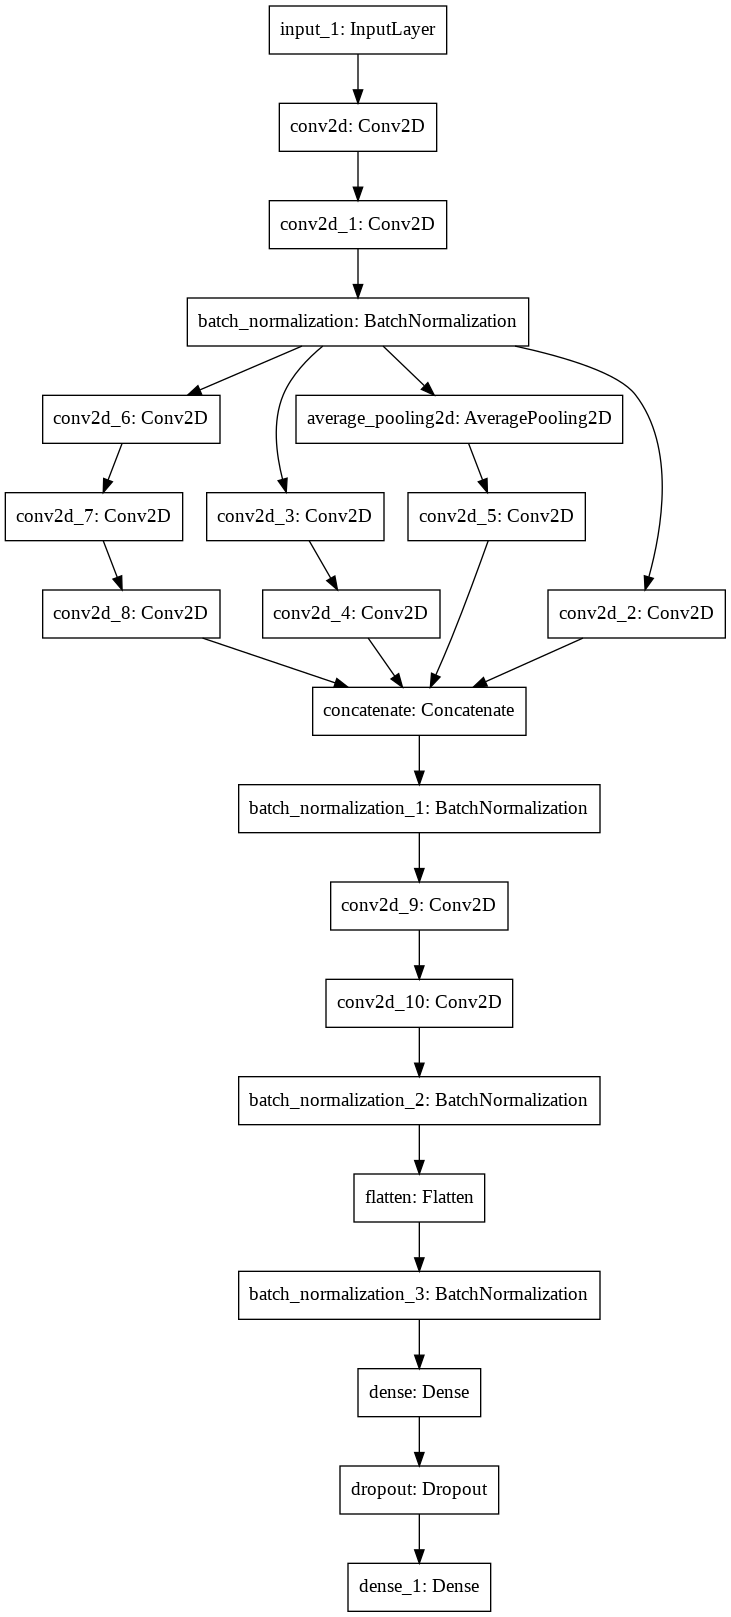

In [ ]:
# Build the model and print (plot) the model.

# Build and print (plot) the model architecture found in figure 7.8 (Chollet)

backend.clear_session()

visible = Input(shape=(32,32,3))
conv1 = Conv2D(32, (1,1), activation='relu', padding = 'same')(visible)
conv2 = Conv2D(32, (1,1), activation='relu', padding = 'same')(conv1)
barchnorm1 = BatchNormalization()(conv2)

# Create Tower 1
conv11 = Conv2D(32, (1,1), activation='relu', strides=2, padding = 'same')(barchnorm1)

# Create Tower 2
conv21 = Conv2D(32, (1,1), activation='relu', padding = 'same')(barchnorm1)
conv22 = Conv2D(32, (3,3), activation='relu', strides=2, padding = 'same')(conv21)

# Create Tower 3
pool31 = AveragePooling2D((3,3), strides=2, padding = 'same')(barchnorm1)
conv32 = Conv2D(32, (3,3), activation='relu', padding = 'same')(pool31)

# Create Tower 4
conv41 = Conv2D(32, (1,1), activation='relu', padding = 'same')(barchnorm1)
conv42 = Conv2D(32, (3,3), activation='relu', padding = 'same')(conv41)
conv43 = Conv2D(32, (3,3), activation='relu', strides=2, padding = 'same')(conv42)

# Concatentate
merge = Concatenate(axis=-1)([conv11, conv22, conv32,conv43])

barchnorm2 = BatchNormalization()(merge)
conv5 = Conv2D(32, (1,1), activation='relu', padding = 'same')(barchnorm2)
conv6 = Conv2D(32, (1,1), activation='relu', padding = 'same')(conv5)
barchnorm3 = BatchNormalization()(conv6)
flat = Flatten()(barchnorm3)
barchnorm4 = BatchNormalization()(flat)

# Hidden connected layer and output
hidden = Dense(32, activation='relu')(barchnorm4)
drop = Dropout(0.5)(hidden)
output = Dense(10, activation='softmax')(drop)


model = Model(inputs=visible, outputs=output)

# plot graph
plot_model(model)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   128         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   1056        conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 32)   128         conv2d_1[0][0]                   
_______________________________________________________________________________________

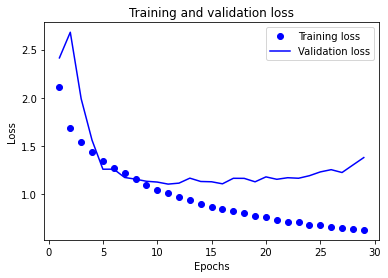

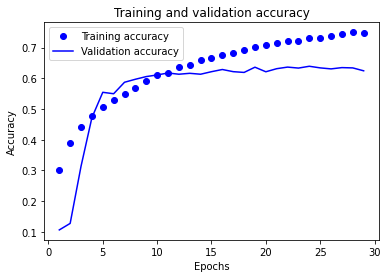

313/313 [==============================] - 2s 6ms/step - loss: 1.2152 - accuracy: 0.6319
test_acc: 0.6319000124931335


In [ ]:
#Compile, fit, plot, and assess in one cell.  
model.summary()

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(x_train, y_train, 
          epochs = 50, 
          batch_size = 256,  
          validation_data=(x_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

### Optimize your neural network. Try using SeparableConv2D layers (Chollet 7.3.1) add or remove layers, change the number of units (nodes), add or remove regularization and normalization. Spend sometime optimizing the network using the techniques we have learned thus far.  Feel free to do your own research on best arcitectures.  Can you improve your test accuracy above 0.80%, which was the benchmark last week? Remember to compile, plot, assess on test data all in one cell.

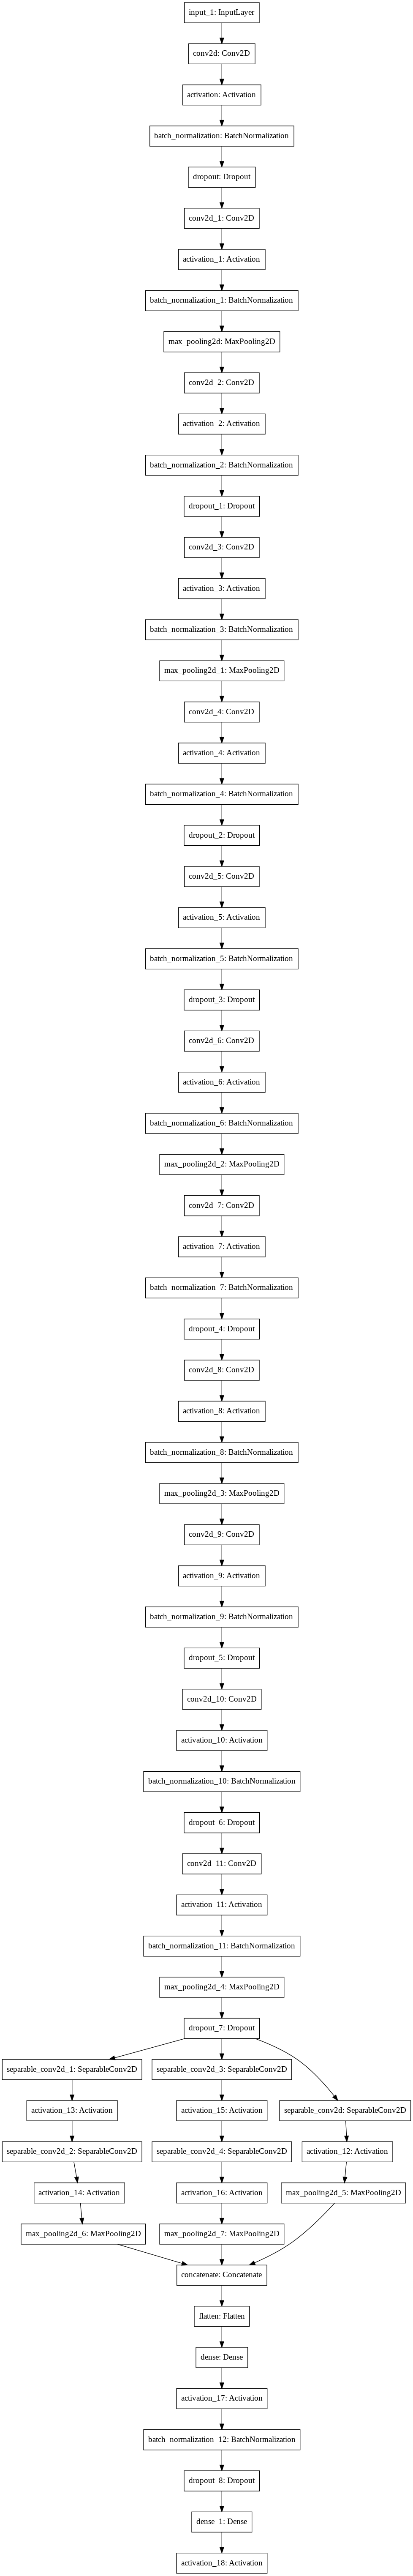

In [ ]:
# Optimize your model(s).
# Build the model(s) and print (plot) the model.
from tensorflow.keras import regularizers

backend.clear_session()
weight_decay=1e-4
# Input model
visible = Input(shape=(32,32,3))

conv1 = Conv2D(32, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(visible)
act1 = Activation('relu')(conv1)
batchnorm1 = BatchNormalization()(act1)
dropout1 = Dropout(0.3)(batchnorm1)

conv2 = Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(dropout1)
act2 = Activation('relu')(conv2)
batchnorm2 = BatchNormalization()(act2)
pool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm2)

conv3 = Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(pool2)
act3 = Activation('relu')(conv3)
batchnorm3 = BatchNormalization()(act3)
dropout2 = Dropout(0.4)(batchnorm3)

conv4 = Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(dropout2)
act4 = Activation('relu')(conv4)
batchnorm4 = BatchNormalization()(act4)
pool4 = MaxPooling2D(pool_size=(2, 2), padding='same')(batchnorm4)

conv5 = Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(pool4)
act5 = Activation('relu')(conv5)
batchnorm5 = BatchNormalization()(act5)
dropout5 = Dropout(0.4)(batchnorm5)

conv6 = Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(dropout5)
act6 = Activation('relu')(conv6)
batchnorm6 = BatchNormalization()(act6)
dropout6 = Dropout(0.4)(batchnorm6)

conv7 = Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(dropout6)
act7 = Activation('relu')(conv7)
batchnorm7 = BatchNormalization()(act7)
pool7 = MaxPooling2D(pool_size=(2,2), padding='same')(batchnorm7)

conv8 = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(pool7)
act8 = Activation('relu')(conv8)
batchnorm8 = BatchNormalization()(act8)
dropout8 = Dropout(0.4)(batchnorm8)

conv9 = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(dropout8)
act9 = Activation('relu')(conv9)
batchnorm9 = BatchNormalization()(act9)
pool9 = MaxPooling2D(pool_size=(2, 2), padding='same')(batchnorm9)

conv10 = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(pool9)
act10 = Activation('relu')(conv10)
batchnorm10 = BatchNormalization()(act10)
dropout10 = Dropout(0.4)(batchnorm10)

conv11 = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(dropout10)
act11 = Activation('relu')(conv11)
batchnorm11 = BatchNormalization()(act11)
dropout11 = Dropout(0.4)(batchnorm11)

conv12 = Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))(dropout11)
act12 = Activation('relu')(conv12)
batchnorm12 = BatchNormalization()(act12)
pool12 = MaxPooling2D(pool_size=(2, 2), padding='same')(batchnorm12)
dropout12 = Dropout(0.4)(pool12)


conv13 = SeparableConv2D(512, (3, 3), padding='same')(dropout12)
act13 = Activation('relu')(conv13)
pool13 = MaxPooling2D(pool_size=(2, 2), padding='same')(act13)

conv141 = SeparableConv2D(512, (3, 3), padding='same')(dropout12)
act14 = Activation('relu')(conv141)
conv142 = SeparableConv2D(1024, (3, 3), padding='same')(act14)
act14 = Activation('relu')(conv142)
pool14 = MaxPooling2D(pool_size=(2, 2), padding='same')(act14)

conv151 = SeparableConv2D(512, (3, 3), padding='same')(dropout12)
act15 = Activation('relu')(conv151)
conv152 = SeparableConv2D(1024, (3, 3), padding='same')(act15)
act15 = Activation('relu')(conv152)
pool15 = MaxPooling2D(pool_size=(2, 2), padding='same')(act15)

merge = Concatenate(axis=-1)([pool13, pool14, pool15])

flat13 = Flatten()(merge)
hidden13 = Dense(512,kernel_regularizer=regularizers.l2(weight_decay))(flat13)
act13 = Activation('relu')(hidden13)
batchnorm13 = BatchNormalization()(act13)
dropout13 = Dropout(0.4)(batchnorm13)
hidden13_2 = Dense(10)(dropout13)
act13 = Activation('softmax')(hidden13_2)


model = Model(inputs=visible, outputs=act13)

# plot graph
plot_model(model)


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 32)   128         activation[0][0]                 
_______________________________________________________________________________________

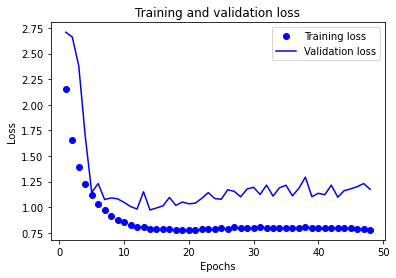

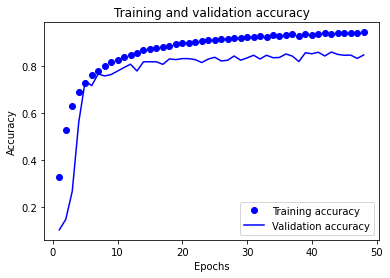

313/313 [==============================] - 6s 19ms/step - loss: 1.1103 - accuracy: 0.8570
test_acc: 0.8569999933242798


In [ ]:
# Compile, fit, plot, and assess in one cell.
model.summary()

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(x_train, y_train, 
          epochs = 50, 
          batch_size = 256,  
          validation_data=(x_val, y_val),
          verbose = 1, callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

### What are the benifits of Funtional API models.  Give an hypothetical example (different than the book) where having different input types would be benificial in API models.  Give another hypotheical exmple (different than the book) where having different output types would be benificial in API models

With the Keras functional API, we are able to define complex models including multi-input models (pass a list of input tensors), multi-output models, directed acyclic graphs, and models with shared layers. Sharing layers enables us to promote generalization of the artificial neural network and save computational time.


A hypothetical usage of the Keras Functional API for multiple inputs would include healthcare data sets. Here we can have numeric or continuous data points such as age and blood pressure, categorical data points such as gender, and image data such as x-rays and MRI’s. These multiple or mixed data types can each be treated as an input into a Keras model through the functional API.

With multiple outputs, our network branches many times creating multiple sets of fully connected heads which can each predict a set of labels. Hypothetically, think of a clothing classification example where we are trying to predict what cloths a given age group prefers (i.e., this helps us predict the current fashion trends). Here we can have one output for the type of clothing (e.g., shirt, pants, shorts, etc.…) and one output for the color (e.g. blue, green, red, etc.…).

---



### Comment on the model arcitecture that worked the best. What was the accuracy? Did you improve accuracry from last week?  How long did the training take?



A modified VGG16 Architecture with Xception gave an accuracy of 0.8569999933242798. This is an improvment from the sequentintal VGG16 model which gave an accuracy of 0.8223 (~3.5% improvement).The training time took approximately 28 minutes.